<a href="https://colab.research.google.com/github/AlexandraLJones/FIRE-CloudComputing/blob/main/FINAL_PRODUCT(vgg16_%26_Model_Confusion_Matrix).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teachable Machine Code

For this notebook, we implemented the first model approach using the Teachable Machine platform. We initially start by importing the necessary libraries into the notebook.

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)
import matplotlib.pyplot as plt
import random as ran
import re
import time
from PIL import Image


Mounted at /content/gdrive


Below we set up the environment. We disable the scientific notation due to the recommendations from the Teachable Machine instructions. From here, we go to the Teachable Machine website and use the training data that we have stored on the drive to make the model.

The model is comprised of three different class identifiers. The three identifiers are Cloud, Obstructed, and No cloud. The corresponding training images for each category that were manually identified by the team are what the Teachable machine model are trained on. Note that we have three different models, V1, V2, and V3 since this shows the progression of us determining how many different test images we need to get a model with presentable results. 

Once the model was created, we downloaded the trained model and stored the .h5 model into the shared google drive. We then use the tensorflow load_model function to load the models into the notebook. 

From here, we read in all of the corresponding labels for each model. These labels are stored as files called labels.txt in our shared google drive space. These labels allow us to identify what the model predicted.

In [ ]:
import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the models to use for testing
model_V2 = tensorflow.keras.models.load_model("/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani's GLOBE Cloud Research/Teachable Machine/ModelV2 (Keras)/keras_model.h5")
model_V1 = tensorflow.keras.models.load_model("/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani's GLOBE Cloud Research/Teachable Machine/ModelV1 (Keras)/keras_model.h5")
model_V3 = tensorflow.keras.models.load_model("/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani's GLOBE Cloud Research/Teachable Machine/ModelV3 (Keras)/keras_model.h5")

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
labels3 = [line for line in open("/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani's GLOBE Cloud Research/Teachable Machine/ModelV3 (Keras)/labels.txt")]
labels1 = [line for line in open("/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani's GLOBE Cloud Research/Teachable Machine/ModelV1 (Keras)/labels.txt")]
labels2 = [line for line in open("/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani's GLOBE Cloud Research/Teachable Machine/ModelV2 (Keras)/labels.txt")]

Now that we have loaded the models, we create a method called `getprediction` which takes as an input an image folder directory and a model (either model_V1, model_V2, or model_V3). This is used to know which model to call the predict method on and which labels to use when interpreting the prediction. 

The method will go through the directory, open each image, identify the type of image that it is and return the predictions as a dictionary identifyng how many of each type of image was identified. 

In [ ]:
#Function that takes in a directory and returns a list that contains the predicted results for each image
import os
import re


def getprediction(src, model):
  if model == model_V1:
    labels = labels1
    vals = {"Cloud": 0, "Obstructed": 0, "No Cloud":0}
  elif model == model_V2:
    labels = labels2
    vals = {"Cloud": 0, "Obstructed": 0, "No Cloud":0}
  else:
    labels = labels3
    vals = {"No Cloud": 0, "Obstructed": 0, "Cloud":0}
  
  predictions = []
  for image in os.listdir(src):
    image = Image.open(src+image)
    image = image.resize((224,224))
    image_array = np.asarray(image)
    normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
    # Load the image into the array
    data[0] = normalized_image_array
    # run the inference
    prediction = model.predict(data)
    choice = np.argmax(prediction)
    predictions.append(labels[choice])
    x = re.search("^[0-2] (\w+ ?\w*)\\n$", labels[choice])
    a = x.group(1)
    vals[a] += 1
  return predictions, vals



Below shows the progression of each of the models that we produce. We start by running the testing data on each of the model iterations. Notice that over the course of each model, the results become more accurate. 

Initially in the first model, we noticed that the model struggled to identify obstructed images. Due to this, we increased the variation in the training data for the obstructed category, providing more unique examples to the model.

In [ ]:
print("Model V1:")

print("No Clouds:")
no_cloud_folder_v1 = getprediction("/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani's GLOBE Cloud Research/Teachable Machine/Training Data/No Clouds/", model_V1)[1]
print(getprediction("/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani's GLOBE Cloud Research/Teachable Machine/Training Data/No Clouds/", model_V1)[1])

print("Obstructed:")
obstructed_folder_v1 = getprediction("/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani's GLOBE Cloud Research/Teachable Machine/Training Data/Obstructed/",model_V1)[1]
print(getprediction("/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani's GLOBE Cloud Research/Teachable Machine/Training Data/Obstructed/",model_V1)[1])

print("Clouds:")
cloud_folder_v1 = getprediction("/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani's GLOBE Cloud Research/Teachable Machine/Training Data/Clouds/",model_V1)[1]
print(getprediction("/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani's GLOBE Cloud Research/Teachable Machine/Training Data/Clouds/",model_V1)[1])

Model V1:
No Clouds:
{'Cloud': 2, 'Obstructed': 4, 'No Cloud': 25}
Obstructed:
{'Cloud': 14, 'Obstructed': 13, 'No Cloud': 3}
Clouds:
{'Cloud': 30, 'Obstructed': 0, 'No Cloud': 0}


We found that after providing more unique examples of obstructed cloud types to the model, our results became skewed towards the obstructed label for all categories the model identitfied. We concluded that this reduced the accuracy for the other two types. 

In [ ]:
print("Model V2:")
print("No Clouds:")
no_cloud_folder_v2 = getprediction("/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani's GLOBE Cloud Research/Teachable Machine/Training Data/No Clouds/", model_V2)[1]
print(getprediction("/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani's GLOBE Cloud Research/Teachable Machine/Training Data/No Clouds/", model_V2)[1])
print("Obstructed:")
obstructed_folder_v2 = getprediction("/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani's GLOBE Cloud Research/Teachable Machine/Training Data/Obstructed/",model_V2)[1]
print(getprediction("/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani's GLOBE Cloud Research/Teachable Machine/Training Data/Obstructed/",model_V2)[1])
print("Clouds:")
cloud_folder_v2 = getprediction("/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani's GLOBE Cloud Research/Teachable Machine/Training Data/Clouds/",model_V2)[1]
print(getprediction("/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani's GLOBE Cloud Research/Teachable Machine/Training Data/Clouds/",model_V2)[1])

Model V2:
No Clouds:
{'Cloud': 0, 'Obstructed': 24, 'No Cloud': 7}
Obstructed:
{'Cloud': 0, 'Obstructed': 30, 'No Cloud': 0}
Clouds:
{'Cloud': 3, 'Obstructed': 27, 'No Cloud': 0}


In this final model, we reduced the skew effect created in model_V2 by adding more unique sample images to the no cloud and cloud labels as well, while keeping the obstructed images used the same. We found that with more unique training data, the model was able to better label the test images.

In [ ]:
print("Model V3:")
print("No Clouds:")
no_cloud_folder_v3 = getprediction("/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani's GLOBE Cloud Research/Teachable Machine/Training Data/No Clouds/", model_V3)[1]
print(getprediction("/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani's GLOBE Cloud Research/Teachable Machine/Training Data/No Clouds/", model_V3)[1])
print("Obstructed:")
obstructed_folder_v3 = getprediction("/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani's GLOBE Cloud Research/Teachable Machine/Training Data/Obstructed/",model_V3)[1]
print(getprediction("/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani's GLOBE Cloud Research/Teachable Machine/Training Data/Obstructed/",model_V3)[1])
print("Clouds:")
cloud_folder_v3 = getprediction("/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani's GLOBE Cloud Research/Teachable Machine/Training Data/Clouds/",model_V3)[1]
print(getprediction("/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani's GLOBE Cloud Research/Teachable Machine/Training Data/Clouds/",model_V3)[1])

Model V3:
No Clouds:
{'No Cloud': 21, 'Obstructed': 9, 'Cloud': 1}
Obstructed:
{'No Cloud': 1, 'Obstructed': 25, 'Cloud': 4}
Clouds:
{'No Cloud': 1, 'Obstructed': 5, 'Cloud': 24}


In this section, we create a bar graph outlining the progression of accuracy of each model. The bars represent accurate predictions of each type: no cloud, cloud, and obstructed. This was done using the data structures presented above and turing the numerical values into a bar graph. Below, each X value represents a different model and the bars represent the corresponding number of correct predictions made for the model.

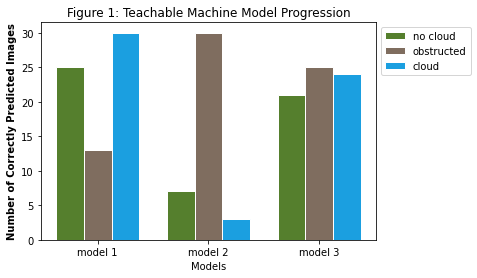

In [ ]:
#bar graph with three x axis labels: model 1, model 2, and model 3
#each category has the true label tredicted for no cloud cloud and obstructed
barWidth = 0.25

barsNoCloud = [no_cloud_folder_v1['No Cloud'],no_cloud_folder_v2['No Cloud'],no_cloud_folder_v3['No Cloud']]
barsObstructed = [obstructed_folder_v1['Obstructed'],obstructed_folder_v2['Obstructed'],obstructed_folder_v3['Obstructed']]
barsClouds = [cloud_folder_v1['Cloud'],cloud_folder_v2['Cloud'],cloud_folder_v3['Cloud']]

r1 = np.arange(len(barsNoCloud))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, barsNoCloud, color='#557f2d', width=barWidth, edgecolor='white', label='no cloud')
plt.bar(r2, barsObstructed, color='#7f6d5f', width=barWidth, edgecolor='white', label='obstructed')
plt.bar(r3, barsClouds, color='#1b9fe0', width=barWidth, edgecolor='white', label='cloud')

plt.title('Figure 1: Teachable Machine Model Progression') 

plt.xlabel('Models')
plt.xticks([r + barWidth for r in range(len(barsNoCloud))], ['model 1','model 2', 'model 3'])

plt.ylabel('Number of Correctly Predicted Images', fontweight='bold')
# Create legend & Show graphic
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

Below is a method that allows for random comparisons of images and to see the results of these images when passed into the model. This was helpful in identifying the places where our model lacked when identifying categories. This was used throughout the model development process for identifying how the model predicted for different test images on a random basis.

In [ ]:
def getrand(n, len, cloud_type):
  results = []
  for i in range(n):
    rand_num = ran.randint(1,len)
    #figure = plt.subplots(figsize=(n+1,1))
    figure = plt.figure()
    try:
      image = Image.open("/content/gdrive/Shareddrives/FIRE-CC/GLOBE Observations/Unique_Photos/"+cloud_type+"/" +cloud_type+str(rand_num)+".jpg")
      image = image.resize((224,224))
      image_array = np.asarray(image)
      normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
      # Load the image into the array
      data[0] = normalized_image_array
      # run the inference
      prediction = model.predict(data)

      choice = np.argmax(prediction)
      results.append(labels[choice])

      figure.add_subplot(plt.imshow(image))

      #plt.draw_all()
      plt.show()
    except: 
      continue
    
    
  return results

print(getrand(5,3000,"Stratus"))


[]


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

# VGG 16 Model 

We imported the required libraries that are needed for the VGG-16 model. Most notably, the keras packages allow us to use the model and extract important information from it.

In [ ]:
import os
import numpy as np
from google.colab import drive
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import decode_predictions
from keras import  models

# Below mounts my google drive to the program

drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In the code block below, the initial VGG16 model is instantiated and the prediction layer of the model is removed since this feature wasn't necessary for the approach taken in the following steps.

Also included in this block is the `load_image` method that properly loads an image and shapes it for use in the VGG16 model.



In [ ]:
base_model = VGG16(weights='imagenet')
model_VGG16 = models.Model(inputs=base_model.input, outputs=base_model.get_layer('flatten').output)

model_VGG16.summary()

def load_image(path):
    img = keras.preprocessing.image.load_img(path, target_size=model_VGG16.input_shape[1:3])
    x = keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x


553467904/553467096 [==============================] - 9s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [ ]:
model_VGG16.compile(loss = 'categorical_crossentropy', metrics=['acc'])

In this block there are two methods that are defined. The first method loads in the image from the source directory passed in and returns the features that were predicted from the model.

The second method takes in an image directory and extracts the features and then applies PCA to the features to reduce the dimensions.

In [ ]:
def id_img (img_dir):
  img, x = load_image(img_dir);
  return model_VGG16.predict(x)[0]


from sklearn.decomposition import PCA
def extract_features (src):
  pca = PCA()
  array = id_img(src)
  features = np.reshape(np.array(array), (-1,1))
  pca.fit(features)
  return pca.transform(features)



In this code block, the goal is to use the cloud training images to build an ideal features list that has the averages of each of the 25,088 features for each of the cloud images. These are the prestine cloud images. 

This is done by looping through each cloud image in the training set, extracting the features from each image and then calculating the average for each of the features. 

This resulted in us now having an ideal list, called avg, that contains the average values of each of the features. This is the ideal feature list for a cloud image.

In [ ]:
# train data based on clouds and then take average of each pos 
features = []
avg = []
for root, dirs, files in os.walk('/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani\'s GLOBE Cloud Research/Photos/Training/Clouds'):
    image_num = 0
    for file in files:
      extract = extract_features(os.path.join(root, file))
      features.append(extract)
      for i in range(25088):
        if image_num == 0:
          avg.append(extract[i][0])
        else:
          avg[i] += extract[i][0]
          
      image_num += 1
        

for i in range(len(avg)):
  avg[i] = avg[i]/30

The code block below defines a method that will use the ideal features found in the previous block and to find the difference between the ideal features and the image passed in. The users can expect to receive back a single number at the end. This number is calculated by taking the mean of the differences that were calculated for each unique feature. 

In [ ]:
def compare_to_cloud_model(src):
  extract = extract_features(src)
  diff = []
  #compare extract to the ideal model of cloud and calculate the difference
  for i in range(25087):
    diff.append(abs(avg[i] - extract[i]))

  return np.mean(diff)



This takes the differences of the features of an image compared to that of the ideal values expected if the ideal image of a cloud.  An array of differences is returned from the diff method with each element representing the variation from that of an ideal image. The overall process is to repeat this method with all images and create a 2-d array containing the difference arrays for all images in the testing set. The difference array in our code is named *results*.

In [ ]:
import matplotlib.pyplot as plt

def diff_for_image_compared_to_ideal(src):
  extract = extract_features(src)
  diff = []
  #compare extract to the ideal model of cloud and calculate the difference
  for i in range(25088):
    diff.append(abs(avg[i] - extract[i]))

  return diff


results = {'Clouds':[], 'Obstructed':[], 'No Clouds':[]}
for key in results.keys():
  for root, dirs, files in os.walk(('/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani\'s GLOBE Cloud Research/Photos/Testing/'+str(key))):
    for file in files:
      results[key].append(diff_for_image_compared_to_ideal(os.path.join(root,file)))


## Alternative VGG16 Model Approach Using more features

For each array within the 2-d *results* array, we will check if the individual differences in features in the list fall within a certain difference range. This range categories are represented by a dictionary with keys such as "less than 0.1" and "less than 0.2". All differences that fall within a certain range are counted up as values in a key-value pair manner.

In [ ]:
# results is dictionary that has the differences of the features compared to the ideal model 
# Take these calculations, count # <.5, <1, <2
# find pattern based on three keys, get a range
clouds = [0,0,0,0,0,0,0,0,0,0,0] #0-9 = <0.1 - 1, 10 = <1, 
obstructed = [0,0,0,0,0,0,0,0,0,0,0]
no_cloud = [0,0,0,0,0,0,0,0,0,0,0]


for image in results['Clouds']: 
  for feat in image:
    if feat <0.1:
      clouds[0] += 1
    elif feat < 0.2:
      clouds[1] += 1
    elif feat < 0.3:
      clouds[2] += 1
    elif feat <0.4:
      clouds[3] += 1
    elif feat < 0.5:
      clouds[4] += 1
    elif feat < 0.6:
      clouds[5] += 1
    elif feat <0.7:
      clouds[6] += 1
    elif feat < 0.8:
      clouds[7] += 1
    elif feat < 0.9:
      clouds[8] += 1
    elif feat < 1:
      clouds[9] += 1

print(clouds)

for image in results['Obstructed']: 
  for feat in image:
    if feat <0.1:
      obstructed[0] += 1
    elif feat < 0.2:
      obstructed[1] += 1
    elif feat < 0.3:
      obstructed[2] += 1
    elif feat <0.4:
      obstructed[3] += 1
    elif feat < 0.5:
      obstructed[4] += 1
    elif feat < 0.6:
      obstructed[5] += 1
    elif feat <0.7:
      obstructed[6] += 1
    elif feat < 0.8:
      obstructed[7] += 1
    elif feat < 0.9:
      obstructed[8] += 1
    elif feat < 1:
      obstructed[9] += 1

print(obstructed)

for image in results['No Clouds']: 
  for feat in image:
    if feat <0.1:
      no_cloud[0] += 1
    elif feat < 0.2:
      no_cloud[1] += 1
    elif feat < 0.3:
      no_cloud[2] += 1
    elif feat <0.4:
      no_cloud[3] += 1
    elif feat < 0.5:
      no_cloud[4] += 1
    elif feat < 0.6:
      no_cloud[5] += 1
    elif feat <0.7:
      no_cloud[6] += 1
    elif feat < 0.8:
      no_cloud[7] += 1
    elif feat < 0.9:
      no_cloud[8] += 1
    elif feat < 1:
      no_cloud[9] += 1

print(no_cloud)


[309199, 159138, 90495, 38564, 17666, 13463, 27903, 10035, 8066, 6384, 0]
[118858, 62519, 13972, 91103, 47985, 31888, 29556, 10489, 24684, 56710, 0]
[72478, 37396, 25354, 41158, 40109, 25667, 40147, 10115, 39998, 41459, 0]


Using the first column of the three lists above, we can calculate the ideal number of features to expect for each of the three categories.

For clouds, the 30 test images presented 309,199 features that are less than 0.1 difference from our ideal model of what a cloud is. To calculate the average value from the values, we tested 30 images, so 309,199/30 = 10306. 

For obstructedm the test images presented 118,858 features that are less than 0.1 difference from our ideal model of what a cloud is. To calculate the average value from the values, we tested 30 images, so 118,858/30 = 3961.

For no clouds, the 30 test images presented 72,478 features that are less than 0.1 difference from our ideal model of what a cloud is. To calculate the average value from the values, we tested 30 images, so 72,478/30 = 2425.

The range for being a cloud:
  (10,306+3961)/2 = 7133
  So the range for being a cloud is any score >= 7133

The range for being obstructed:
  (2425+2961)/2 = 2693
  2693 < x < 7133

The range for being in the category of no cloud is:
  x <= 2693

This is a function that would be used to calculate the cloud score, that is how close the image is to being a cloud. The higher the score the more likely it is to be a cloud. The ranges for this are included below:
Cloud:
score >= 7133 
Obstructed:
2693 < score < 7133
No Cloud:
score <= 2693

In [ ]:
def calc_score(src):
  x = diff_for_image_compared_to_ideal(src)
  num = 0
  for i in x:
    if i < 0.1:
      num+=1
  return num
print(calc_score('/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani\'s GLOBE Cloud Research/Photos/Testing/Obstructed/Copy of Copy of Altocumulus261.jpg'))



15


To create a visualization for this feature difference alternative approach, it was best to calculate the scores for all images(by calling the calc_score method) within each category and if the score was not in accordance with it's true label, then it was classified as *missed* and the missed counter was incremented. On the other hand, with a correct classification, the *image_num* counter is incremented. This procedure is followed for all three cloud category folders. 

In [ ]:
def get_missed(src, type):
  for root, dirs, files in os.walk(src):
      image_num = 0
      missed = 0
      for file in files:
        if type == 0: #cloud 
          if (calc_score(os.path.join(root,file))) >= 7133:
            image_num+=1
          else:
            missed +=1
        elif type == 1: #obstructed
          if (calc_score(os.path.join(root,file))) > 2693 and (calc_score(os.path.join(root,file))) < 7133:
            image_num+=1
          else:
            missed +=1
        else: #no clouds
          if (calc_score(os.path.join(root,file))) <= 2693:
            image_num+=1
          else:
            missed +=1
  return image_num, missed
cloud_missed = get_missed('/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani\'s GLOBE Cloud Research/Photos/Testing/Clouds/', 0)
obs_missed = get_missed('/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani\'s GLOBE Cloud Research/Photos/Testing/Obstructed/', 1)
no_cloud_missed = get_missed('/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani\'s GLOBE Cloud Research/Photos/Testing/No Clouds/', 2)
print(cloud_missed[0])

16


A stacked bar graph was created showing the accuracy of the Alternative Feature Difference Method by taking the previous results showing the missed and correct classifications from each folder: cloud, no cloud, obstructed. Based on the graph, the method mislabeled all of the obstructed images and did worse than the original VGG16 method for the other categories.


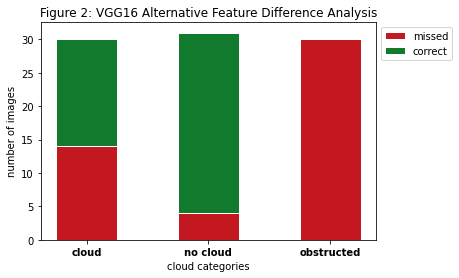

In [ ]:
bars2 = [cloud_missed[0], no_cloud_missed[0], obs_missed[0]]
bars1 = [cloud_missed[1], no_cloud_missed[1], obs_missed[1]]

 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2]
 
# Names of group and bar width
names = ['cloud' , 'no cloud', 'obstructed']
barWidth = 0.5
 
# Create brown bars
plt.bar(r, bars1, color='#c41820', edgecolor='white', width=barWidth,label='missed')
# Create green bars (middle), on top of the first ones
plt.bar(r, bars2, bottom=bars1, color='#127a2d', edgecolor='white', width=barWidth, label='correct')

 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("cloud categories")
plt.ylabel("number of images")
plt.title("Figure 2: VGG16 Alternative Feature Difference Analysis")
plt.legend(loc='upper left', bbox_to_anchor=(1,1) )

# Show graphic
plt.show()

As we can see above, this model did not perform as expected. We should have seen the image_num variable seen very high and the number missed being very low. Due to the huge difference from our expectations, we conclude that we should have more training data for the ideal model. 

##Teachable Machine Model Comparisons


Next we produce three confusion matrices to show the progression of the Teachable Machine models that were produced in the previous section. 

In [ ]:
true_labels_Teachable_Comp = []
pred_labels_Teachable_Comp_1 = []
pred_labels_Teachable_Comp_2 = []
pred_labels_Teachable_Comp_3 = []

dirs = os.listdir('/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani\'s GLOBE Cloud Research/Photos/Testing')

def getprediction_Comp(src, model):
  if model == model_V1:
    labels = labels1
  elif model == model_V2:
    labels = labels2
  else:
    labels = labels3

  image = Image.open(src)
  image = image.resize((224,224))
  image_array = np.asarray(image)
  normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
  # Load the image into the array
  data[0] = normalized_image_array
  # run the inference
  prediction = model.predict(data)
  choice = np.argmax(prediction)
  x = re.search("^[0-2] (\w+ ?\w*)\\n$", labels[choice])
  a = x.group(1)
  if a == "Cloud":
    return 0
  elif a == "Obstructed":
    return 1
  else:
    return 2


In the code block below, we obtain the true labels for each category: cloud, no cloud, obstructed. Then we get predicted labels for each model and store this information into arrays which are used to plot three seperate confusion matrices. This helped us determine the model with the greatest accuracy.

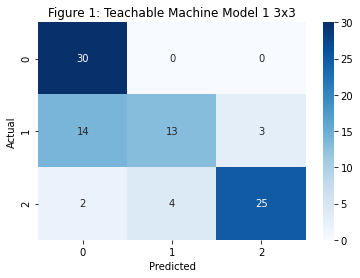

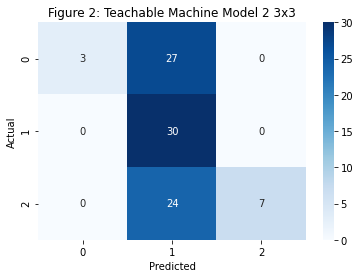

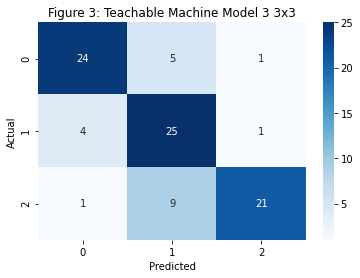

In [ ]:
for curr in dirs:
  for root, dirs, files in os.walk('/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani\'s GLOBE Cloud Research/Photos/Testing/' + curr):
      for file in files:
        # Getting the true label for the file we are on 
        if curr == 'Clouds':
          true_labels_Teachable_Comp.append(0)
        elif curr == 'Obstructed':
          true_labels_Teachable_Comp.append(1)
        else:
          true_labels_Teachable_Comp.append(2)
        
  
        #Getting the predicted label for the same file just identified above 
        pred_labels_Teachable_Comp_1.append(getprediction_Comp('/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani\'s GLOBE Cloud Research/Photos/Testing/' + curr +'/'+ file, model_V1))
        pred_labels_Teachable_Comp_2.append(getprediction_Comp('/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani\'s GLOBE Cloud Research/Photos/Testing/' + curr +'/'+ file, model_V2))
        pred_labels_Teachable_Comp_3.append(getprediction_Comp('/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani\'s GLOBE Cloud Research/Photos/Testing/' + curr +'/'+ file, model_V3))



plt.title('Figure 1: Teachable Machine Model 1 3x3')
conf_matrix(true_labels_Teachable_Comp, pred_labels_Teachable_Comp_1)
plt.title('Figure 2: Teachable Machine Model 2 3x3')     
conf_matrix(true_labels_Teachable_Comp, pred_labels_Teachable_Comp_2)
plt.title('Figure 3: Teachable Machine Model 3 3x3')
conf_matrix(true_labels_Teachable_Comp, pred_labels_Teachable_Comp_3)   

# Comparison of the Teachable Machine Model to the VGG16 Approach

In the code block, we make a confusion matrix to test how accurate the above approach is to what was expected. This is done by labeling two lists, one which is the true labels, or what we expect the model to predict, and the second list is the pred_labels, the values that the model thinks the test images are.  

In [ ]:
# Make a confusion matrix to test how well the data is matched

#Anything below the difference of 0.5 we considered to be a cloud.

# value of 0 represents cloud, value of one respresents either obstructed or no clouds
true_labels = [] #array for actual image labels
pred_labels = [] #array for pred image labels

dirs = os.listdir('/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani\'s GLOBE Cloud Research/Photos/Testing')

for curr in dirs:
  for root, dirs, files in os.walk('/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani\'s GLOBE Cloud Research/Photos/Testing/' + curr):
      for file in files:
        if curr == 'Clouds':
          true_labels.append("Cloud")
        else:
          true_labels.append("No Cloud")
        
        if (compare_to_cloud_model(os.path.join(root,file)) < 0.5):
          pred_labels.append("Cloud")
        else:
          pred_labels.append("No Cloud")
          

From the matrix below, we see that the model does very well at identifying images that are not clouds. However, there is still room for improvement in terms of identifying images that solely have clouds in them, as 12 images that should have been cloud images were misidentified as no-cloud images.

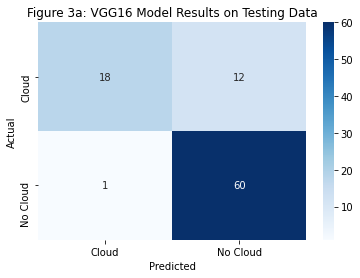

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd

def conf_matrix(true, pred):
  data = {'Actual':    true,
          'Predicted': pred
          }

  df = pd.DataFrame(data, columns=['Actual','Predicted'])
  confusion_matrix = pd.crosstab(df['Actual'], df['Predicted'], rownames=['Actual'], colnames=['Predicted'])

  sn.heatmap(confusion_matrix, cmap="Blues", annot=True)
  
  plt.show()
plt.title('Figure 3a: VGG16 Model Results on Testing Data')
conf_matrix(true_labels, pred_labels)

Following the above, we wanted to see how well the VGG16 model compared to our Teachable Machine model 3 predictions. The confusion matrix below shows how well the Teachable Machine model was able to identify the same set of testing data. 

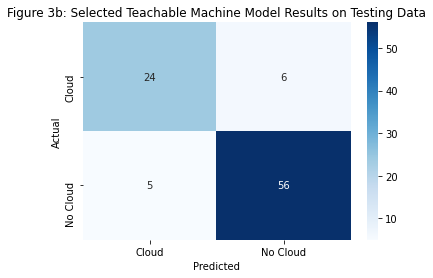

In [ ]:
import tensorflow.keras
from PIL import Image, ImageOps

# Matrix using model
# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the models to use for testing
model_V3 = tensorflow.keras.models.load_model("/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani's GLOBE Cloud Research/Teachable Machine/ModelV3 (Keras)/keras_model.h5")

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
labels3 = [line for line in open("/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani's GLOBE Cloud Research/Teachable Machine/ModelV3 (Keras)/labels.txt")]

# value of 0 represents cloud, value of one respresents either obstructed or no clouds
true_labels_model = [] #array for actual image labels
pred_labels_model = [] #array for pred image labels

dirs = os.listdir('/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani\'s GLOBE Cloud Research/Photos/Testing')

# get prediction of image. Returns 1 if image is not a cloud or obstructed and returns 0 if image is cloud
import re
def getprediction(src):
  labels = labels3  
  image = Image.open(src)
  image = image.resize((224,224))
  image_array = np.asarray(image)
  normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
  # Load the image into the array
  data[0] = normalized_image_array
  # run the inference
  prediction = model_V3.predict(data)
  choice = np.argmax(prediction)
  x = re.search("^[0-2] (\w+ ?\w*)\\n$", labels[choice])
  a = x.group(1)
  if a == "Cloud":
    return "Cloud"
  else:
    return "No Cloud"

for curr in dirs:
  for root, dirs, files in os.walk('/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani\'s GLOBE Cloud Research/Photos/Testing/' + curr):
      for file in files:
        if curr == 'Clouds':
          true_labels_model.append("Cloud")
        else:
          true_labels_model.append("No Cloud")
        
        pred_labels_model.append(getprediction('/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani\'s GLOBE Cloud Research/Photos/Testing/' + curr +'/'+ file))
          
plt.title('Figure 3b: Selected Teachable Machine Model Results on Testing Data')       
conf_matrix(true_labels_model, pred_labels_model)        

From the confusion matrix above, we notice that the model does much better at identifying cloud images correctly, only misidentifying 6 images that were actually clouds as no-cloud. 

##Additional Methods for Sorting

This method uses the Teachable Machine models and identifies/stores only cloud images to an output directory provided. This is ideal if there is a directory of unsorted images of no clouds, obstructed, or cloud images and the user wants cloud images in the end. 

In [ ]:
import shutil

def sort_img(outputdir, src, model):
  if model == 'model_V1':
    labels = labels1
  elif model == 'model_V2':
    labels = labels2
  else:
    labels = labels3
  
  for image_name in os.listdir(src):
    try:
      image = Image.open(src+image_name) 
      image = image.resize((224,224))
      image_array = np.asarray(image)
      normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
      # Load the image into the array
      data[0] = normalized_image_array
      # run the inference
      prediction = model.predict(data)
      if prediction[0][2] >= 0.965:
        choice = np.argmax(prediction)
        x = re.search("^[0-2] (\w+ ?\w*)\\n$", labels[choice])
        a = x.group(1)
        if a == 'Cloud':
          shutil.copy((src+ str(image_name)), outputdir)
    except:
      print("Skipped")
  
#sort_img('/content/gdrive/Shareddrives/FIRE-CC/Peer Mentors/Charles and Dhvani\'s GLOBE Cloud Research/Testrun2/', '/content/gdrive/Shareddrives/FIRE-CC/GLOBE Observations/Unique_Photos/Stratus/', model_V3)

#Future Plans
From this project, we were able to determine that the third Teachable Machine model was the most accurate and therefore can be used as our Quality Control System for future purposes. In order to progress the automated quality control project, it is best to create a futher refined training dataset to feed into the Teachable Machine for an even more accurate filtering system. This can be approached multiple ways but the one that best builds off this project is to use the refined dataset created from the selected model (Teachable Machine Model 3) and pass a certain portion of this data into a new Teachable Machine as the training set. The possible issue could be maintaining a good training to testing ratio and having unused images for further testing of other models. If the Teachable Machine approach does not seem viable then the alternative approach can also be improved to meet a higher accuracy rate whether this be through changing the difference calculation process or adding in more testing data. 